In [ ]:
!pip3 install numpy seaborn pandas matplotlib scikit-learn

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as cv
import sklearn.neighbors as nb
from sklearn.model_selection import cross_val_score
%matplotlib inline


[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [27]:
# Load the dataset
try:
    diabetes_df = pd.read_csv('../preprocessing_scripts/Data_preprocessed_10000.csv')
    print("Dataset loaded successfully.")
    print(diabetes_df.head())
except FileNotFoundError:
    diabetes_df = None
    print("File not found. Please check the file path.")

Dataset loaded successfully.
   Diabetes_binary  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0              1.0     0.0       1.0        1.0 -1.071593     1.0     0.0   
1              0.0     0.0       0.0        1.0  0.628607     1.0     0.0   
2              0.0     1.0       1.0        1.0 -0.319133     1.0     0.0   
3              0.0     0.0       1.0        1.0  0.017644     1.0     0.0   
4              1.0     1.0       0.0        1.0  2.311887     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           0.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0

In [18]:
print("Shape of the dataset:", diabetes_df.shape)
print("Type of columns in the dataset:")
print(diabetes_df.dtypes)

Shape of the dataset: (9939, 22)
Type of columns in the dataset:
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


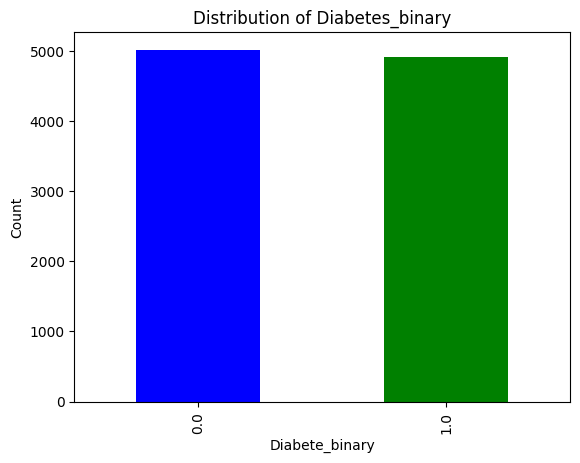

In [19]:
diabetes_df['Diabetes_binary'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabete_binary')
plt.ylabel('Count')
plt.show()

In [20]:
X = diabetes_df.drop(columns=['Diabetes_binary'])
y = diabetes_df['Diabetes_binary']

Text(0.5, 1.0, 'Correlation Between Features')

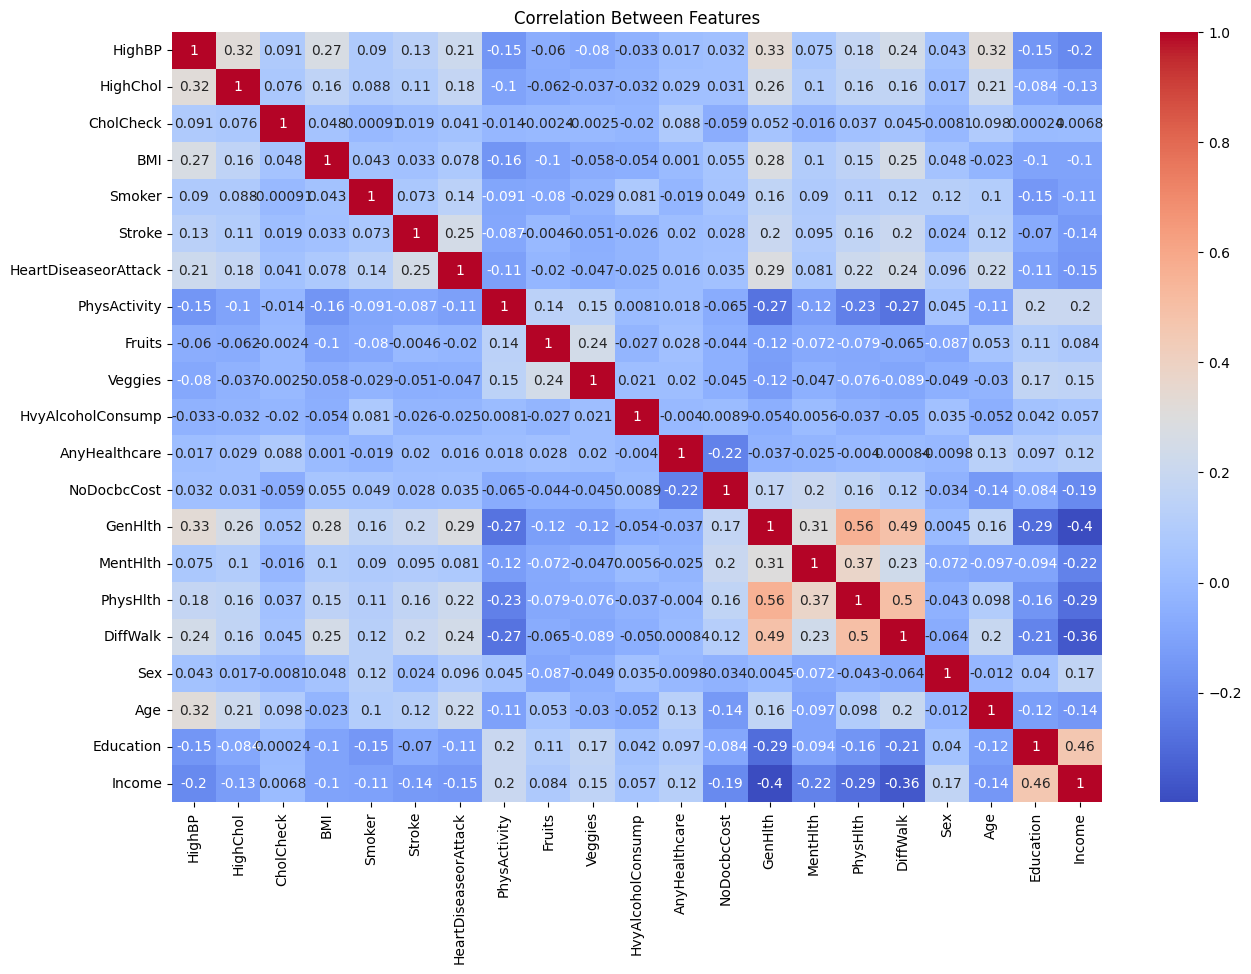

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Between Features')

In [22]:
y=diabetes_df['Diabetes_binary'].values
X = diabetes_df.drop('Diabetes_binary', axis=1).astype('float32')

In [23]:
from sklearn.model_selection import train_test_split

(X_train, X_test,  y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

## Default Values

Test dataset with default values.

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

configs = [
    ('Linear',         {'kernel':'linear'}),
    ('Poly deg=2',     {'kernel':'poly',   'degree':2}),
    ('Poly deg=3',     {'kernel':'poly',   'degree':3}),
    ('RBF',            {'kernel':'rbf'}),
    ('Sigmoid',        {'kernel':'sigmoid'})
]

for name, params in configs:
    pipe = make_pipeline(StandardScaler(),
                         SVC(**params, probability=True, random_state=42))
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc    = accuracy_score(y_test, y_pred)
    cm     = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:"); print(cm)
    print("Classification Report:"); print(report)


=== Linear ===
Accuracy: 0.7492
Confusion Matrix:
[[1075  431]
 [ 317 1159]]
Classification Report:
              precision    recall  f1-score   support

         0.0     0.7723    0.7138    0.7419      1506
         1.0     0.7289    0.7852    0.7560      1476

    accuracy                         0.7492      2982
   macro avg     0.7506    0.7495    0.7490      2982
weighted avg     0.7508    0.7492    0.7489      2982


=== Poly deg=2 ===
Accuracy: 0.7210
Confusion Matrix:
[[1067  439]
 [ 393 1083]]
Classification Report:
              precision    recall  f1-score   support

         0.0     0.7308    0.7085    0.7195      1506
         1.0     0.7116    0.7337    0.7225      1476

    accuracy                         0.7210      2982
   macro avg     0.7212    0.7211    0.7210      2982
weighted avg     0.7213    0.7210    0.7210      2982


=== Poly deg=3 ===
Accuracy: 0.7334
Confusion Matrix:
[[1073  433]
 [ 362 1114]]
Classification Report:
              precision    recall  

## Optimal Hyperparameters

Use GridSearch to determine the best hyperparameters for each algorithm.

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 1) Defino pipeline con escalado + SVC polinomial
pipe = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=2, probability=True, random_state=42)
)

# 2) Rango de C (ajusta los límites a lo que te interese)
Cs = np.logspace(-3, 3, num=13)      # de 1e-3 a 1e3
param_grid = {'svc__C': Cs}

# 3) GridSearchCV con verbose alto
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3,        # <-- niveles: 1=básico, 2=más info, 3=muy detallado
    return_train_score=False
)

print("⚙️  Arrancando GridSearchCV…")
grid.fit(X_train, y_train)
print("✅  GridSearchCV finalizado.")

# 4) Resultado
print("Mejor C encontrado:", grid.best_params_['svc__C'])
print("Mejor Accuracy CV:", grid.best_score_)


⚙️  Arrancando GridSearchCV…
Fitting 10 folds for each of 13 candidates, totalling 130 fits
[CV 1/10] END .....svc__C=0.0031622776601683794;, score=0.543 total time=   7.8s
[CV 10/10] END ....svc__C=0.0031622776601683794;, score=0.535 total time=   7.7s
[CV 9/10] END ......................svc__C=0.01;, score=0.601 total time=   7.4s
[CV 10/10] END ......svc__C=0.03162277660168379;, score=0.633 total time=   7.4s
[CV 5/10] END .......svc__C=0.31622776601683794;, score=0.691 total time=   6.6s
[CV 6/10] END .......................svc__C=1.0;, score=0.731 total time=   6.8s
[CV 7/10] END ........svc__C=3.1622776601683795;, score=0.717 total time=   7.7s
[CV 8/10] END ......................svc__C=10.0;, score=0.741 total time=  11.3s
[CV 9/10] END ........svc__C=31.622776601683793;, score=0.708 total time=  21.7s
[CV 10/10] END ....................svc__C=100.0;, score=0.702 total time=  50.1s
[CV 7/10] END ........svc__C=316.22776601683796;, score=0.723 total time= 3.1min
[CV 8/10] END ...

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Pipeline sin fijar degree
pipe = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', probability=True, random_state=42)
)

# Rango de C
Cs = np.logspace(-3, 3, num=13)      # de 1e-3 a 1e3

# Grid incluyendo degree = 1 y degree = 3
param_grid = {
    'svc__degree': [1, 3],
    'svc__C':      Cs
}

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3,          # nivel de detalle alto
    return_train_score=False
)

print("⚙️  Arrancando GridSearchCV (degree=[1,3])…")
grid.fit(X_train, y_train)
print("✅  GridSearchCV finalizado.\n")

print("👉 Mejor combinación encontrada:", grid.best_params_)
print("👉 Mejor Accuracy CV:         ", grid.best_score_)


⚙️  Arrancando GridSearchCV (degree=[1,3])…
Fitting 10 folds for each of 26 candidates, totalling 260 fits
[CV 4/10] END ......svc__C=0.001, svc__degree=1;, score=0.675 total time=   7.8s
[CV 6/10] END ......svc__C=0.001, svc__degree=3;, score=0.533 total time=   8.1s
[CV 9/10] END svc__C=0.0031622776601683794, svc__degree=1;, score=0.728 total time=   6.8s
[CV 9/10] END svc__C=0.0031622776601683794, svc__degree=3;, score=0.568 total time=   7.8s
[CV 3/10] END .......svc__C=0.01, svc__degree=3;, score=0.654 total time=   7.6s
[CV 4/10] END svc__C=0.03162277660168379, svc__degree=1;, score=0.737 total time=   5.3s
[CV 5/10] END svc__C=0.03162277660168379, svc__degree=3;, score=0.760 total time=   7.0s
[CV 6/10] END ........svc__C=0.1, svc__degree=1;, score=0.750 total time=   5.1s
[CV 6/10] END ........svc__C=0.1, svc__degree=3;, score=0.757 total time=   6.2s
[CV 7/10] END svc__C=0.31622776601683794, svc__degree=1;, score=0.741 total time=   4.9s
[CV 8/10] END svc__C=0.3162277660168379

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definimos el SVM con kernel RBF
svc_rbf = SVC(kernel='rbf')

# Parámetros a explorar solo para RBF
param_grid_rbf = {
    'C':     [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Configuramos el GridSearchCV
grid_rbf = GridSearchCV(
    estimator=svc_rbf,
    param_grid=param_grid_rbf,
    scoring='accuracy',   # o la métrica que prefieras
    cv=10,
    n_jobs=-1,
    verbose=2
)

# Entrenamos
grid_rbf.fit(X_train, y_train)

# Resultados
print("Mejores parámetros RBF:", grid_rbf.best_params_)
print("Mejor score CV RBF:", grid_rbf.best_score_)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
Mejores parámetros RBF: {'C': 100, 'gamma': 0.001}
Mejor score CV RBF: 0.7481650541635656


Evaluando C=0.01, gamma=scale, coef0=0.0
  AUC scores por fold: [0.82424587 0.81687956 0.83350839 0.80418948 0.82433561]
  Media AUC: 0.8206 ± 0.0098

Evaluando C=0.01, gamma=0.01, coef0=0.0
  AUC scores por fold: [0.81779828 0.80996331 0.82047454 0.79540859 0.81800289]
  Media AUC: 0.8123 ± 0.0092

Evaluando C=0.01, gamma=0.001, coef0=0.0
  AUC scores por fold: [0.81385293 0.8056484  0.81382944 0.79079795 0.81461634]
  Media AUC: 0.8077 ± 0.0091

Evaluando C=0.01, gamma=scale, coef0=0.1
  AUC scores por fold: [0.8241158  0.81675568 0.83314656 0.80391243 0.82404823]
  Media AUC: 0.8204 ± 0.0097

Evaluando C=0.01, gamma=0.01, coef0=0.1
  AUC scores por fold: [0.81775493 0.80992202 0.82040218 0.79526593 0.81791605]
  Media AUC: 0.8123 ± 0.0092

Evaluando C=0.01, gamma=0.001, coef0=0.1
  AUC scores por fold: [0.81383434 0.80564427 0.81381703 0.79080209 0.81462254]
  Media AUC: 0.8077 ± 0.0091

Evaluando C=0.01, gamma=scale, coef0=0.5
  AUC scores por fold: [0.82261488 0.81513708 0.8307998

NameError: name 'roc_auc_score' is not defined

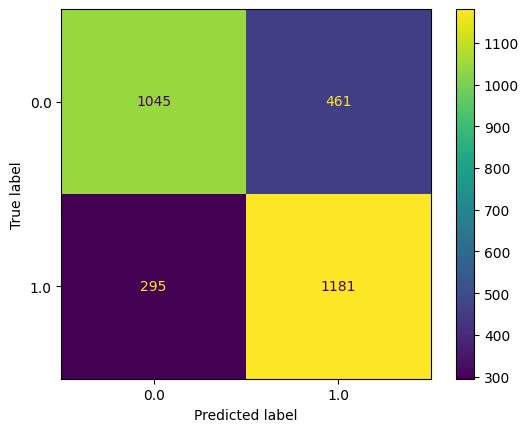

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import ParameterGrid, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Función para encontrar el umbral óptimo (Youden’s J)
def find_best_threshold(clf, X, y, cv=10, random_state=1):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)
    probs = cross_val_predict(clf, X, y, cv=skf, method='predict_proba')[:, 1]
    fpr, tpr, thresholds = roc_curve(y, probs)
    j_scores = tpr - fpr
    return thresholds[j_scores.argmax()]

# 2. Pipeline con escalado + SVM (sin fijar kernel todavía)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='sigmoid', probability=True, random_state=42))
])

# 3. Grid de hiperparámetros para sigmoid
param_grid = {
    'svc__C':    [0.01, 0.1, 1.0, 10.0],
    'svc__gamma':['scale', 0.01, 0.001],
    'svc__coef0':[0.0, 0.1, 0.5, 1.0]
}

# 4. Búsqueda manual para poder imprimir resultados al vuelo
best_score = 0
best_params = None
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for params in ParameterGrid(param_grid):
    print(f"Evaluando C={params['svc__C']}, gamma={params['svc__gamma']}, coef0={params['svc__coef0']}")
    pipe.set_params(**params)
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
    print(f"  AUC scores por fold: {scores}")
    print(f"  Media AUC: {scores.mean():.4f} ± {scores.std():.4f}\n")
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_params = params.copy()

print("←→ Mejores hiperparámetros encontrados ←→")
print(best_params)
print(f"Mejor AUC medio: {best_score:.4f}")

# 5. Entrenar con los mejores hiperparámetros
pipe.set_params(**best_params)
pipe.fit(X_train, y_train)

# 6. Calcular umbral óptimo sobre entrenamiento
best_thresh = find_best_threshold(pipe, X_train, y_train)
print(f"\nUmbral óptimo (sigmoid): {best_thresh:.3f}")

# 7. Evaluar en test
probs_test = pipe.predict_proba(X_test)[:,1]
y_pred_test = (probs_test >= best_thresh).astype(int)

print("\nClassification Report (test):")
print(classification_report(y_test, y_pred_test))

print("Matriz de confusión (test):")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

# Curva ROC en test
fpr, tpr, _ = roc_curve(y_test, probs_test)
auc_test = roc_auc_score(y_test, probs_test)
print(f"\nAUC test: {auc_test:.3f}")


In [1]:
# GridSearchCV Results
print("\nResultados de GridSearchCV:")
print("→ Linear best C = 10   mean CV accuracy = 0.7506")
print("→ Degree = 2: best C = 1000   mean CV accuracy = 0.7211")
print("→ Degree = 3: best C = 0.1   mean CV accuracy = 0.7440")
print("→ RBF: best C = 100, gamma = 0.001  mean CV accuracy = 0.7482")
print("→ Sigmoid: best C = 10, gamma = 0.001, coef = 0.0  mean CV accuracy = 0.463")


Resultados de GridSearchCV:
→ Linear best C = 10   mean CV accuracy = 0.7506
→ Degree = 2: best C = 1000   mean CV accuracy = 0.7211
→ Degree = 3: best C = 0.1   mean CV accuracy = 0.7440
→ RBF: best C = 100, gamma = 0.001  mean CV accuracy = 0.7482
→ Sigmoid: best C = 10, gamma = 0.001, coef = 0.0  mean CV accuracy = 0.463


## Optimal Executions

Executions of each model with the optimal parameters to compare the results

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

pipe_linear = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=5, probability=True, random_state=42)
)

pipe_linear.fit(X_train, y_train)
y_pred = pipe_linear.predict(X_test)
y_proba = pipe_linear.predict_proba(X_test)[:, 1]

print("\n=== Linear ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred, digits=4))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")


=== Linear ===
Accuracy: 0.7492
Confusion matrix:
[[1076  430]
 [ 318 1158]]
Classification report:
              precision    recall  f1-score   support

         0.0     0.7719    0.7145    0.7421      1506
         1.0     0.7292    0.7846    0.7559      1476

    accuracy                         0.7492      2982
   macro avg     0.7505    0.7495    0.7490      2982
weighted avg     0.7508    0.7492    0.7489      2982

ROC AUC: 0.8269


In [29]:
pipe_rbf = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=100, gamma=0.001, probability=True, random_state=42)
)

pipe_rbf.fit(X_train, y_train)
y_pred = pipe_rbf.predict(X_test)
y_proba = pipe_rbf.predict_proba(X_test)[:, 1]

print("\n=== RBF ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred, digits=4))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")


=== RBF ===
Accuracy: 0.7515
Confusion matrix:
[[1045  461]
 [ 280 1196]]
Classification report:
              precision    recall  f1-score   support

         0.0     0.7887    0.6939    0.7383      1506
         1.0     0.7218    0.8103    0.7635      1476

    accuracy                         0.7515      2982
   macro avg     0.7552    0.7521    0.7509      2982
weighted avg     0.7556    0.7515    0.7507      2982

ROC AUC: 0.8279


In [30]:
pipe_sigmoid = make_pipeline(
    StandardScaler(),
    SVC(kernel='sigmoid', C=10.0, gamma=0.001, coef0=0.0, probability=True, random_state=42)
)

pipe_sigmoid.fit(X_train, y_train)
scores = pipe_sigmoid.decision_function(X_test)
umbral = 0.463
y_pred = (scores >= umbral).astype(int)
y_proba = pipe_sigmoid.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("\n=== Sigmoid ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred, digits=4))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")


=== Sigmoid ===
Accuracy: 0.7388
Confusion matrix:
[[1251  255]
 [ 524  952]]
Classification report:
              precision    recall  f1-score   support

         0.0     0.7048    0.8307    0.7626      1506
         1.0     0.7887    0.6450    0.7097      1476

    accuracy                         0.7388      2982
   macro avg     0.7468    0.7378    0.7361      2982
weighted avg     0.7463    0.7388    0.7364      2982

ROC AUC: 0.8265


In [31]:
pipe_poly_deg2 = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', degree=2, C=1000, probability=True, random_state=42)
)

pipe_poly_deg2.fit(X_train, y_train)
y_pred = pipe_poly_deg2.predict(X_test)
y_proba = pipe_poly_deg2.predict_proba(X_test)[:, 1]

print("\n=== Poly degree 2 ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred, digits=4))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")


=== Poly degree 2 ===
Accuracy: 0.7223
Confusion matrix:
[[1029  477]
 [ 351 1125]]
Classification report:
              precision    recall  f1-score   support

         0.0     0.7457    0.6833    0.7131      1506
         1.0     0.7022    0.7622    0.7310      1476

    accuracy                         0.7223      2982
   macro avg     0.7239    0.7227    0.7220      2982
weighted avg     0.7242    0.7223    0.7220      2982

ROC AUC: 0.7905


## Best result visualization

Confussion matrix + ROC Curve

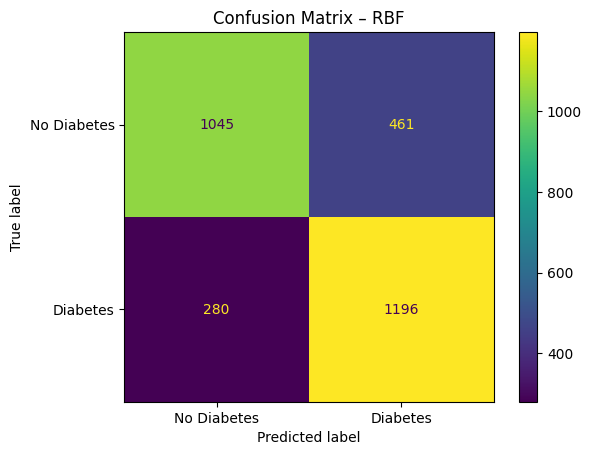

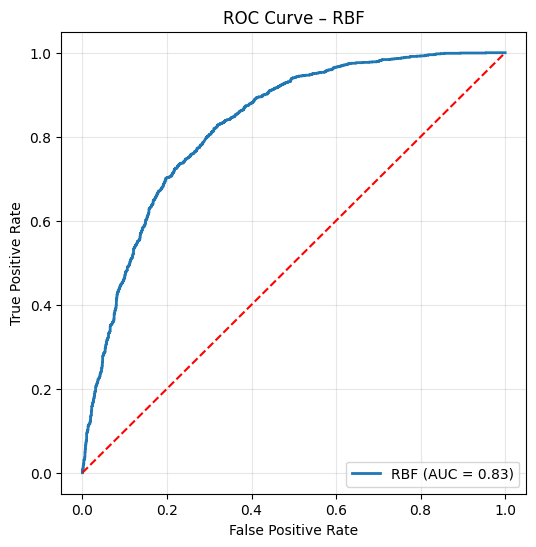

In [ ]:
# Coloca esta celda al final de tu notebook src/Support_Vector_Machines-TEMP.ipynb

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# 1) Entrenar modelo RBF con los mejores parámetros (o los que quieras probar)
pipe_rbf = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=100, gamma=0.001, probability=True, random_state=42)
)
pipe_rbf.fit(X_train, y_train)

# 2) Predecir etiquetas y probabilidades sobre el test
y_pred  = pipe_rbf.predict(X_test)
y_proba = pipe_rbf.predict_proba(X_test)[:, 1]

# 3) Matriz de confusión
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=['No Diabetes', 'Diabetes'], normalize=None
)
disp.ax_.set_title('Confusion Matrix – RBF')
plt.show()

# 4) Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc     = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'RBF (AUC = {roc_auc:.2f})', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – RBF')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

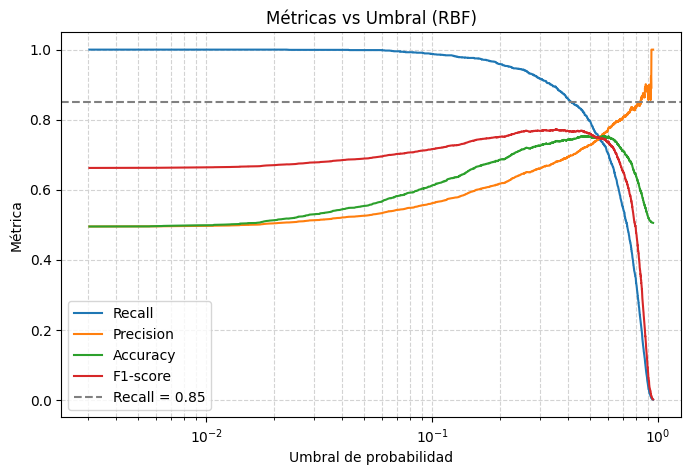

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, accuracy_score, recall_score, precision_score, f1_score

# 1) Entrenar RBF
pipe_rbf = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=100, gamma=0.001, probability=True, random_state=42)
)
pipe_rbf.fit(X_train, y_train)

# 2) Obtener probabilidades de clase positiva
y_proba_rbf = pipe_rbf.predict_proba(X_test)[:, 1]

# 3) Calcular curva precision-recall y thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_rbf)
ths   = thresholds
recs  = recalls[:-1]
prefs = precisions[:-1]

# 4) Para cada umbral calcula accuracy y F1
accs = []
f1s  = []
for t in ths:
    y_pred_t = (y_proba_rbf >= t).astype(int)
    accs.append(accuracy_score(y_test, y_pred_t))
    f1s.append(f1_score(y_test, y_pred_t))

# 5) Dibujar todas las métricas vs umbral
plt.figure(figsize=(8,5))
plt.plot(ths, recs,  label="Recall")
plt.plot(ths, prefs, label="Precision")
plt.plot(ths, accs,  label="Accuracy")
plt.plot(ths, f1s,   label="F1-score")
plt.axhline(0.85, color='grey', linestyle='--', label="Recall = 0.85")
plt.xscale('log')
plt.xlabel("Umbral de probabilidad")
plt.ylabel("Métrica")
plt.title("Métricas vs Umbral (RBF)")
plt.legend(loc="best")
plt.grid(True, which="both", ls="--", c='lightgrey')
plt.show()

In [ ]:
# Extraer el modelo SVM del pipeline
svm_model = pipe_rbf.named_steps['svc']

# Número total de vectores soporte
num_sv = svm_model.support_.shape[0]

# Número de vectores soporte por clase
num_sv_per_class = svm_model.n_support_

# Total muestras entrenamiento
total_samples = X_train.shape[0]

# Porcentaje vectores soporte
percent_sv = num_sv / total_samples * 100

print(f"Número total de vectores soporte: {num_sv}")
print(f"Número de vectores soporte por clase: {num_sv_per_class}")
print(f"Porcentaje de vectores soporte respecto al total de muestras: {percent_sv:.2f}%")


Número total de vectores soporte: 4005
Número de vectores soporte por clase: [1993 2012]
Porcentaje de vectores soporte respecto al total de muestras: 57.57%


In [ ]:
import pandas as pd

# Índices de los vectores soporte
sv_indices = svm_model.support_

# Muestras soporte
support_vectors = X_train.iloc[sv_indices]  # si X_train es DataFrame, si es numpy, quitar .iloc

print("Primeros 5 vectores soporte:")
print(support_vectors.head())

Primeros 5 vectores soporte:
      HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
7477     0.0       0.0        1.0 -1.071593     1.0     0.0   
5275     1.0       1.0        1.0  1.996853     0.0     0.0   
1278     0.0       0.0        1.0  0.332678     1.0     0.0   
7436     0.0       1.0        1.0 -0.496655     0.0     0.0   
107      0.0       1.0        1.0  0.017644     0.0     0.0   

      HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  AnyHealthcare  \
7477                   0.0           0.0     0.0      0.0  ...            0.0   
5275                   0.0           0.0     1.0      0.0  ...            1.0   
1278                   0.0           1.0     1.0      1.0  ...            1.0   
7436                   1.0           1.0     1.0      1.0  ...            1.0   
107                    0.0           1.0     0.0      0.0  ...            1.0   

      NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
7477          0.0      2.0       0